In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [ ]:
df = pd.read_csv('./data/bmw_pricing_challenge.csv')
valid = df.price

In [ ]:
df.dtypes

maker_key            object
model_key            object
mileage               int64
engine_power          int64
registration_date    object
fuel                 object
paint_color          object
car_type             object
feature_1              bool
feature_2              bool
feature_3              bool
feature_4              bool
feature_5              bool
feature_6              bool
feature_7              bool
feature_8              bool
price                 int64
sold_at              object
dtype: object

In [ ]:
df[['model_key']].value_counts()

model_key     
320               752
520               633
318               569
X3                438
116               358
                 ... 
ActiveHybrid 5      1
735                 1
635                 1
630                 1
i8                  1
Length: 75, dtype: int64

In [ ]:
features = df[['maker_key','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','sold_at']]

In [ ]:
df = df.drop(features, axis=1)

In [ ]:
df.loc[0:2, 'registration_date']

0    2012-02-01
1    2016-04-01
2    2012-04-01
Name: registration_date, dtype: object

In [ ]:
for i, col in enumerate(df.registration_date):
    df.loc[i, 'registration_date'] = str(col[0:4])

In [ ]:
df

,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,price
0,118,140411,100,2012,diesel,black,convertible,11300
1,M4,13929,317,2016,petrol,grey,convertible,69700
2,320,183297,120,2012,diesel,white,convertible,10200
3,420,128035,135,2014,diesel,red,convertible,25100
4,425,97097,160,2014,diesel,silver,convertible,33400
...,...,...,...,...,...,...,...,...
4838,218 Gran Tourer,39743,110,2015,diesel,black,van,14600
4839,218 Active Tourer,49832,100,2015,diesel,grey,van,17500
4840,218 Gran Tourer,19633,110,2015,diesel,grey,van,17000
4841,218 Active Tourer,27920,110,2016,diesel,brown,van,22700


In [ ]:
df.rename(columns={'registration_date':'registration_year'}, inplace=True)
df['registration_year']=df['registration_year'].astype('float64')

In [ ]:
df.isna().sum()

model_key            0
mileage              0
engine_power         0
registration_year    0
fuel                 0
paint_color          0
car_type             0
price                0
dtype: int64

In [ ]:
df

,model_key,mileage,engine_power,registration_year,fuel,paint_color,car_type,price
0,118,140411,100,2012.0,diesel,black,convertible,11300
1,M4,13929,317,2016.0,petrol,grey,convertible,69700
2,320,183297,120,2012.0,diesel,white,convertible,10200
3,420,128035,135,2014.0,diesel,red,convertible,25100
4,425,97097,160,2014.0,diesel,silver,convertible,33400
...,...,...,...,...,...,...,...,...
4838,218 Gran Tourer,39743,110,2015.0,diesel,black,van,14600
4839,218 Active Tourer,49832,100,2015.0,diesel,grey,van,17500
4840,218 Gran Tourer,19633,110,2015.0,diesel,grey,van,17000
4841,218 Active Tourer,27920,110,2016.0,diesel,brown,van,22700


In [ ]:
df.car_type.value_counts()

estate         1606
sedan          1168
suv            1058
hatchback       699
subcompact      117
coupe           104
convertible      47
van              44
Name: car_type, dtype: int64

In [ ]:
model = df['model_key'].copy()
df = df.drop('model_key', axis=1)
model.unique()

array(['118', 'M4', '320', '420', '425', '335', '325', 'Z4', '120', '220',
       '650', '135', '218', '318', '430', 'M3', '330', '225', 'M235',
       '316', '435', '640', '640 Gran Coupé', '435 Gran Coupé', 'i8',
       '630', '430 Gran Coupé', '635', '520', '525', '530', '535',
       '320 Gran Turismo', '518', '116', '328', '523', 'X3', 'M550',
       '528', '325 Gran Turismo', '125', '318 Gran Turismo',
       '420 Gran Coupé', 'i3', '114', '520 Gran Turismo',
       '530 Gran Turismo', 'M135', '418 Gran Coupé', '330 Gran Turismo',
       '335 Gran Turismo', '730', '123', '535 Gran Turismo', '740', '750',
       'ActiveHybrid 5', '735', 'M5', 'X5', 'X1', 'X4', 'X6', 'X6 M',
       'X5 M', 'X5 M50', '218 Active Tourer', '218 Gran Tourer', '216',
       '220 Active Tourer', '216 Gran Tourer', '216 Active Tourer',
       '225 Active Tourer', '214 Gran Tourer'], dtype=object)

In [ ]:
# # Vehicle series simplification
def series_simple(c):
    for i in model:
        if i[0] == str(c):
            model[(model == i)] = '{} Series'.format(i[0])
        elif i[1] == str(c):
            model[(model == i)] = '{} Series'.format(i[0])

for i in range(1,8):
    series_simple(i)

model[(model == 'ActiveHybrid 5')] = '5 Series'
model[(model == 'i8')] = 'i Series'

In [ ]:
all_df = pd.concat([model, df], axis=1)

In [ ]:
all_df.mileage.describe()

count    4.843000e+03
mean     1.409628e+05
std      6.019674e+04
min     -6.400000e+01
25%      1.029135e+05
50%      1.410800e+05
75%      1.751955e+05
max      1.000376e+06
Name: mileage, dtype: float64

In [ ]:
all_df[(all_df['mileage'] < 0)] = 0

In [ ]:
all_df.price.describe()

count      4843.000000
mean      15812.595499
std        9183.793077
min           0.000000
25%       10800.000000
50%       14200.000000
75%       18600.000000
max      178500.000000
Name: price, dtype: float64

In [ ]:
all_df.query('price == 0')

,model_key,mileage,engine_power,registration_year,fuel,paint_color,car_type,price
2938,0,0,0,0.0,0,0,0,0


In [ ]:
all_df.sort_values('price')


,model_key,mileage,engine_power,registration_year,fuel,paint_color,car_type,price
2938,0,0,0,0.0,0,0,0,0
4356,X Series,79685,190,2014.0,diesel,black,suv,100
1255,3 Series,170381,135,2013.0,diesel,silver,estate,100
1832,1 Series,174524,85,2014.0,diesel,blue,hatchback,100
879,3 Series,134156,105,2014.0,diesel,grey,estate,100
...,...,...,...,...,...,...,...,...
4731,X Series,4530,230,2016.0,diesel,silver,suv,73100
4146,X Series,2970,423,2016.0,petrol,red,suv,82400
90,i Series,12402,170,2016.0,hybrid_petrol,grey,coupe,95200
4684,X Series,103222,140,2014.0,diesel,grey,suv,142800


In [ ]:
all_df = all_df.replace(0, np.nan)
all_df.dropna(axis=0, inplace=True)

In [ ]:
all_df.query('price < 500')

,model_key,mileage,engine_power,registration_year,fuel,paint_color,car_type,price
565,3 Series,179358.0,120.0,2013.0,diesel,black,estate,100.0
630,3 Series,147558.0,105.0,2014.0,diesel,white,estate,100.0
879,3 Series,134156.0,105.0,2014.0,diesel,grey,estate,100.0
1255,3 Series,170381.0,135.0,2013.0,diesel,silver,estate,100.0
1513,5 Series,358332.0,100.0,2000.0,diesel,blue,estate,400.0
1558,5 Series,358333.0,100.0,2000.0,diesel,blue,estate,400.0
1832,1 Series,174524.0,85.0,2014.0,diesel,blue,hatchback,100.0
2473,5 Series,230578.0,85.0,1997.0,diesel,black,sedan,200.0
2574,5 Series,229880.0,85.0,1997.0,diesel,black,sedan,200.0
2611,5 Series,230264.0,85.0,1997.0,diesel,black,sedan,200.0


In [ ]:
# indexNames = df[ (df['Price'] >= 30) & (all_df['Price'] <= 70) ].index
# df.drop(indexNames , inplace=True)

In [ ]:
gp_paint_color = all_df.groupby('paint_color').mean()['price']
gp_hp = all_df.groupby('engine_power').mean()['price']
gp_ry = all_df.groupby('registration_year').mean()['price']
gp_ct = all_df.groupby('car_type').mean()['price']

In [ ]:
gp_paint_color.sort_values(ascending=False)

paint_color
orange    18866.666667
white     17338.919926
red       16500.000000
black     16137.806373
beige     15817.073171
grey      15595.744681
brown     15367.741935
blue      15114.929577
silver    14816.109422
green      7200.000000
Name: price, dtype: float64

In [ ]:
gp_hp.sort_values(ascending=False)

engine_power
423.0    82400.000000
195.0    57433.333333
317.0    56725.000000
235.0    54785.714286
412.0    41600.000000
280.0    41237.500000
250.0    38900.000000
183.0    35150.000000
309.0    34825.000000
230.0    33794.117647
233.0    32700.000000
190.0    27171.473354
239.0    25700.000000
225.0    25267.346939
240.0    24900.000000
140.0    24371.084337
300.0    22000.000000
192.0    21750.000000
180.0    21087.096774
160.0    20523.529412
220.0    19860.000000
155.0    18164.646465
25.0     17900.000000
80.0     17350.000000
142.0    16666.666667
135.0    16582.426304
210.0    16476.190476
170.0    15028.571429
75.0     14844.444444
112.0    14800.000000
200.0    14666.666667
121.0    14600.000000
189.0    14550.000000
224.0    14000.000000
107.0    13933.333333
120.0    13725.222930
137.0    13678.947368
150.0    13167.441860
122.0    12653.333333
173.0    12372.000000
105.0    12359.645233
119.0    12300.000000
236.0    12100.000000
100.0    11902.456140
110.0    11308.4507

<AxesSubplot:xlabel='paint_color', ylabel='price'>

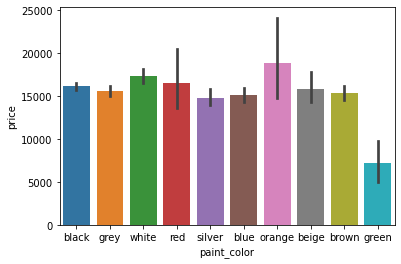

In [ ]:
sns.style=('whitegrid')
sns.barplot(data=all_df, x='paint_color', y='price')

<AxesSubplot:xlabel='engine_power', ylabel='price'>

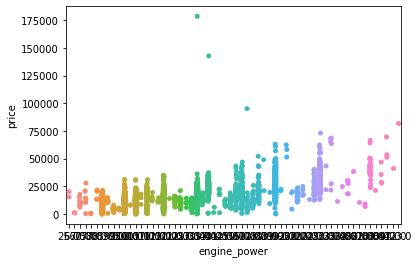

In [ ]:
sns.stripplot(data=all_df, x='engine_power', y='price')

In [ ]:
# sns.swarmplot(data=all_df, x='car_type', y='price')

<AxesSubplot:xlabel='car_type', ylabel='price'>

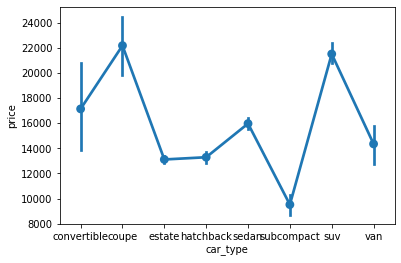

In [ ]:
sns.pointplot(data=all_df, x='car_type', y='price')

<AxesSubplot:xlabel='car_type', ylabel='price'>

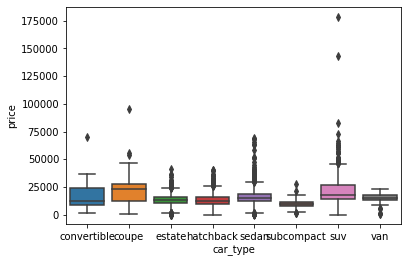

In [ ]:
sns.boxplot(data=all_df, x='car_type', y='price')

<AxesSubplot:xlabel='car_type', ylabel='price'>

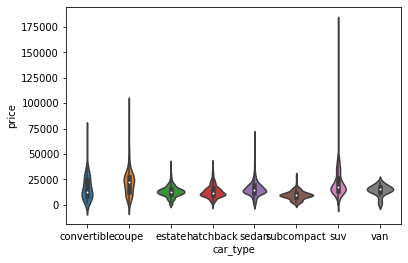

In [ ]:
sns.violinplot(data=all_df, x='car_type', y='price')

In [ ]:
# from sklearn.preprocessing import SimpleImpute
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder as OHE
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, accuracy_score, mean_squared_error
from sklearn.compose import ColumnTransformer

import xgboost
import lightgbm

In [ ]:
train_y = all_df.price
train_x = all_df.drop(['price'], axis=1) 

In [ ]:
train_X, valid_X, train_Y, valid_Y = train_test_split(train_x, train_y, test_size=0.2, random_state=0) 
valid_X.head(5)

,model_key,mileage,engine_power,registration_year,fuel,paint_color,car_type
1172,3 Series,168833.0,105.0,2014.0,diesel,black,estate
3100,5 Series,205844.0,150.0,2010.0,diesel,grey,sedan
3029,5 Series,142975.0,120.0,2012.0,diesel,grey,sedan
1564,5 Series,116761.0,135.0,2014.0,diesel,brown,estate
3560,5 Series,143763.0,120.0,2012.0,diesel,brown,sedan


In [ ]:
categorical_col = [cname for cname in train_X.columns if train_X[cname].dtype == 'object']
numberical_col = [cname for cname in train_X.columns if train_X[cname].dtype == 'float64']
numberical_col

['mileage', 'engine_power', 'registration_year']

In [ ]:
OH = OHE(handle_unknown='ignore', sparse = False)
OH_train_X = pd.DataFrame(OH.fit_transform(train_X[categorical_col]))
OH_valid_X = pd.DataFrame(OH.transform(valid_X[categorical_col]))

le_train_X = train_X.copy()
le_valid_X = valid_X.copy()

le = LabelEncoder()
for cat in categorical_col:
    le_train_X[cat] = le.fit_transform(le_train_X[cat])
    le_valid_X[cat] = le.transform(le_valid_X[cat])

In [ ]:
le_train_X.dtypes

model_key              int32
mileage              float64
engine_power         float64
registration_year    float64
fuel                   int32
paint_color            int32
car_type               int32
dtype: object

In [ ]:
def score_set(train_X, valid_X, train_Y, valid_Y):
    model = RandomForestRegressor(n_estimators=100, n_jobs=5, random_state=0)
    model.fit(train_X, train_Y)
    preds = model.predict(valid_X)
    return print('Score is {}'.format(mean_absolute_error(valid_Y, preds)))

score_set(le_train_X, le_valid_X, train_Y, valid_Y)

Score is 2318.4138286893703


In [ ]:
score_set(OH_train_X, OH_valid_X, train_Y, valid_Y)

Score is 4791.064301171617


In [ ]:
train_X_num = all_df[numberical_col].copy()
train_X_num

,mileage,engine_power,registration_year
0,140411.0,100.0,2012.0
1,13929.0,317.0,2016.0
2,183297.0,120.0,2012.0
3,128035.0,135.0,2014.0
4,97097.0,160.0,2014.0
...,...,...,...
4838,39743.0,110.0,2015.0
4839,49832.0,100.0,2015.0
4840,19633.0,110.0,2015.0
4841,27920.0,110.0,2016.0


In [ ]:
def get_score(n_estimate):
    pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('model', RandomForestRegressor(n_estimators=n_estimate, n_jobs=5, random_state=0))
])
    score = cross_val_score(pipeline, train_X_num, train_y, cv=5, scoring='neg_mean_absolute_error') * -1
    return score.mean()

get_score(100)

3495.018342675986

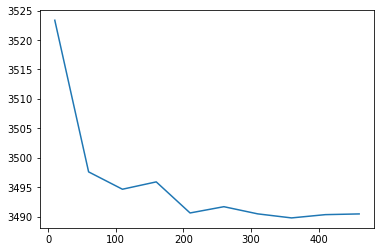

In [ ]:
test={}
for i in range(10, 500, 50):
    test[i] = get_score(i)

plt.plot(list(test.keys()), list(test.values()))
plt.show()

In [ ]:
xgb_cv=xgboost.XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb_cv,
                        parameters,
                        cv = 5,
                        n_jobs = 5,
                        verbose=True)
xgb_grid.fit(le_train_X, train_Y)
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[15:03:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
0.7893785607288374
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'subsample': 0.7}


In [ ]:
xg_model = xgboost.XGBRegressor(n_estimators=500, learning_rate=0.1, random_state=0)
xg_model.fit(le_train_X, train_Y)
xg_prediction_1 = xg_model.predict(le_valid_X)
mean_absolute_error(xg_prediction_1, valid_Y)

2391.982073426616

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

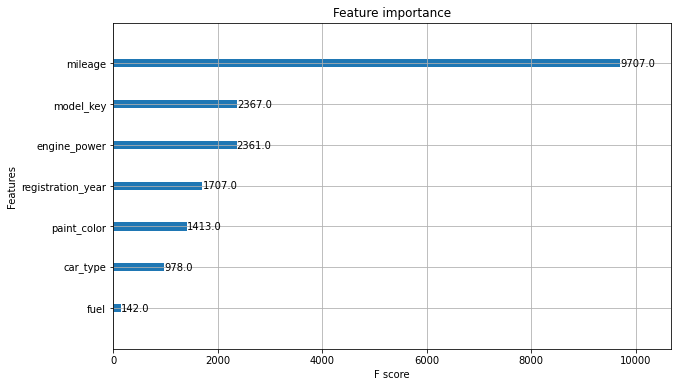

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
xgboost.plot_importance(xg_model, ax=ax)

In [ ]:
lgb = lightgbm.LGBMClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
# evals = [(le_valid_X, valid_Y)]
# lgb.fit(le_train_X, train_Y, early_stopping_rounds=100, eval_metric = "logloss", eval_set=evals)
lgb.fit(le_train_X, train_Y)
lgb_pred = lgb.predict(le_valid_X)
mean_absolute_error(valid_Y, lgb_pred)

5452.734778121775

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

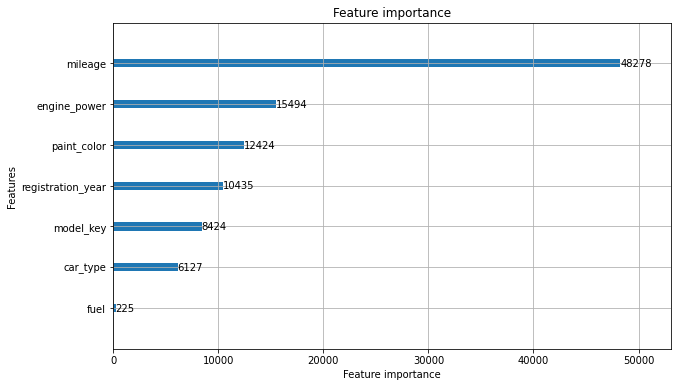

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
lightgbm.plot_importance(lgb, ax=ax)

In [115]:
# parameters = {
#     'task' : ['predict'],
#     'boosting': ['gbdt' ],
#     'objective': ['root_mean_squared_error'],
#     'num_iterations': [  1500, 2000,5000  ],
#     'learning_rate':[  0.05, 0.005 ],
#   #  'num_leaves':[ 7, 15, 31  ],
#   #  'max_depth' :[ 10,15,25],
#   #  'min_data_in_leaf':[15,25 ],
#   # 'feature_fraction': [ 0.6, 0.8,  0.9],
#   #   'bagging_fraction': [  0.6, 0.8 ],
#   #   'bagging_freq': [   100, 200, 400  ],
     
# }

# gsearch_lgb = GridSearchCV(lgb, param_grid = parameters, n_jobs=6, verbose=10)
# gsearch_lgb.fit(le_train_X, train_Y)
 

# print('best params')
# print (gsearch_lgb.best_params_)
# preds_lgb_model = gsearch_lgb.predict(le_valid_X)
# rmse_lgb = np.sqrt(mean_squared_error(valid_Y, preds_lgb_model))
# print(" RMSE: %f" % (rmse_lgb ))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\evfrn\anaconda3\envs\kaggle\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
